In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr

In [4]:
from ufs2arco import sources
from ufs2arco.transforms.horizontal_regrid import get_bounds

In [18]:
src = sources.AWSHRRRArchive(
    t0={"start": "2015-03-15T00", "end": "2015-03-15T06", "freq": "6h"},
    fhr={"start": 0, "end": 0, "step": 6},
    variables=["orog"],
)
uds = src.open_sample_dataset(
    dims={"t0": src.t0[0], "fhr": src.fhr[0]},
    open_static_vars=True,
    cache_dir=f"./cache/grid-creation",
)
uds = uds.isel(t0=0, drop=True)
uds = uds.rename({"latitude": "lat", "longitude": "lon"})
uds = get_bounds(uds)
uds = uds.rename({"x_vertices": "x_b", "y_vertices": "y_b"})
#uds["x"] = xr.DataArray(np.arange(len(uds.x)), dims="x")
#uds["y"] = xr.DataArray(np.arange(len(uds.y)), dims="y")

In [32]:
centers = uds.isel(x_b=slice(1,-1,2), y_b=slice(1,-1,2))
centers = centers.drop_vars(["lat", "lon", "orog"])
centers = centers.rename({"lat_b": "lat", "lon_b": "lon", "x_b": "x", "y_b": "y"})
centers


<xarray.Dataset> Size: 8MB
Dimensions:  (y: 529, x: 899)
Coordinates:
    lat      (y, x) float64 4MB 21.15 21.17 21.18 21.2 ... 47.86 47.84 47.82
    lon      (y, x) float64 4MB 237.3 237.3 237.4 237.4 ... 298.9 298.9 299.0
Dimensions without coordinates: y, x
Data variables:
    *empty*

<xarray.Dataset> Size: 8MB
Dimensions:  (y_b: 530, x_b: 900)
Coordinates:
    lat_b    (y_b, x_b) float64 4MB 21.12 21.14 21.15 ... 47.88 47.86 47.84
    lon_b    (y_b, x_b) float64 4MB 237.3 237.3 237.4 ... 298.9 299.0 299.1
Dimensions without coordinates: y_b, x_b
Data variables:
    *empty*

In [34]:
cds = xr.merge([bounds, centers])

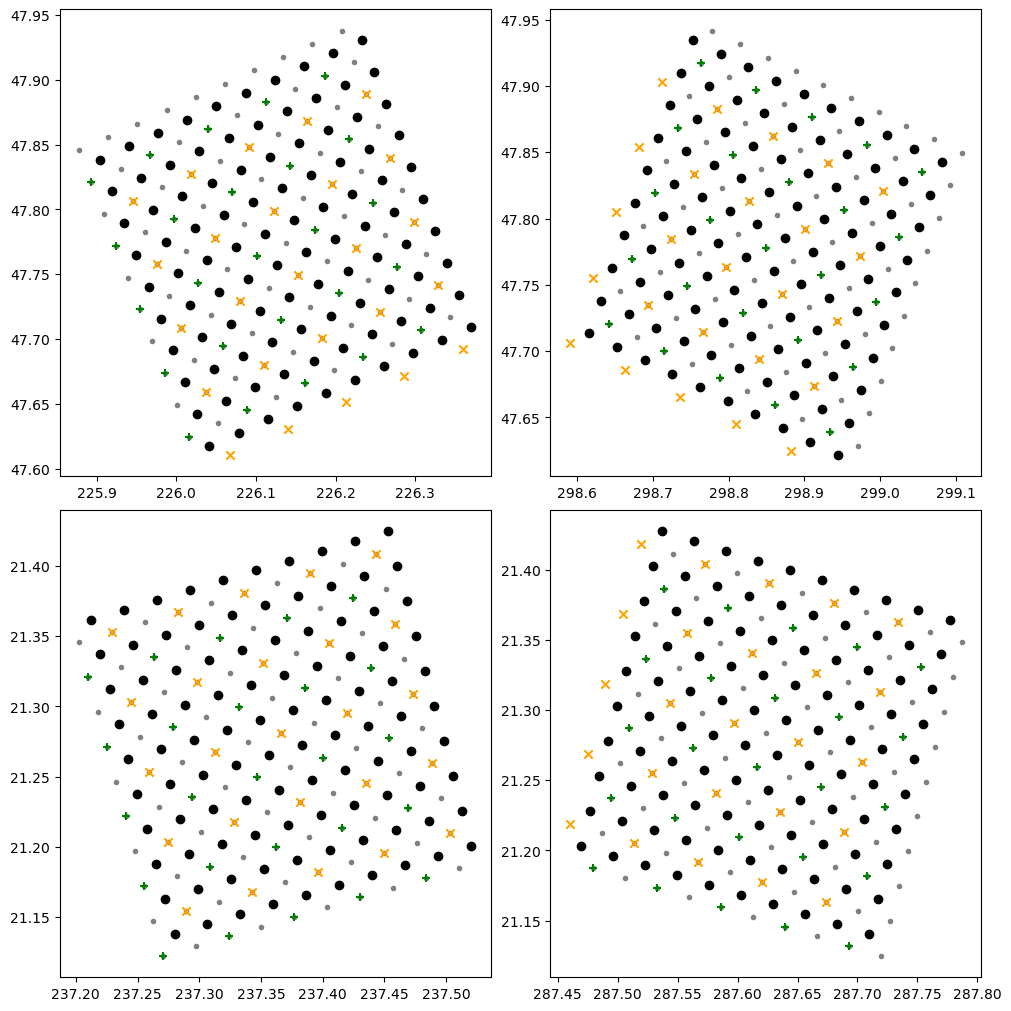

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)


for xds, factor, color_c, color_b, m_c, m_b in zip(
    [uds, cds],
    [10, 5],
    ["black", "orange"],
    ["gray", "green"],
    ["o", "x"],
    [".", "+"],
):
    for slc, slc_b, ax in zip(
        [
            {"x": slice(factor), "y": slice(-factor, None)},
            {"x": slice(-factor, None), "y": slice(-factor, None)},
            {"x": slice(factor), "y": slice(factor)},
            {"x": slice(-factor, None), "y": slice(factor)},
        ],
        [
            {"x_b": slice(factor), "y_b": slice(-factor, None)},
            {"x_b": slice(-factor, None), "y_b": slice(-factor, None)},
            {"x_b": slice(factor), "y_b": slice(factor)},
            {"x_b": slice(-factor, None), "y_b": slice(factor)},
        ],
        axs.flatten(),
    ):
        ax.scatter(xds.lon.isel(**slc), xds.lat.isel(**slc), c=color_c, marker=m_c)
        ax.scatter(xds.lon_b.isel(**slc_b), xds.lat_b.isel(**slc_b), c=color_b, marker=m_b)
        #ax.scatter(hmesh.lon.isel(**slc_b), hmesh.lat.isel(**slc_b), c="orange", marker="*")